In [1]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
from datetime import datetime
from bitquant.data.exchange import BinanceExchange
from bitquant.data.data_client import DataClient
from bitquant.quantlib.strategy_engine import StrategyEngine
from bitquant.quantlib.signal_generation.factor_calculator import FactorCalculator, function_map
from bitquant.quantlib.signal_generation.factor_selector import FactorSelector
from bitquant.quantlib.signal_generation.factor_scaler import FactorScaler
from bitquant.quantlib.signal_generation.factor_aggregator import FactorAggregatorIC
from bitquant.quantlib.evaluation.evaluator import Evaluator

/Users/andy/Desktop/crypto_park/bittensor/bitquant/bitquant/quantlib/signal_generation/factor_scaler.py:46: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  cls.normalized_data = cls.normalized_data.unstack().iloc[rolling_window - 1:].stack()
/Users/andy/Desktop/crypto_park/bittensor/bitquant/bitquant/quantlib/signal_generation/factor_scaler.py:48: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  how='all').fillna(0).stack()
/Users/andy/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, 

1518 小时, 5050 笔交易, 4196555.146 USDT, PnL -2847.09 USDT = -28.6068%
平均每秒 0.00 笔交易, 平均每秒 0.00 次更新, 平均每次换仓 PnL: -0.0188327%
最大多仓: 247.128, 最大空仓: -238.758, maker手续费损耗: 0.00, taker手续费损耗: 1678.62
最大总杠杆: 1.50,最小总杠杆: 0.98,最大多头风险头寸杠杆：0.03, 最大空头风险头寸杠杆：-0.03 
最大回撤: 32.207%,交易胜率: 46.245%,平均盈亏比: 97.519% 年化 PnL: -165.08%
月化交易量: 1990460 USDT, 每小时总换手率: 0.2763, 每小时各标的的平均换手率: 0.0691, 年化夏普率: -5.28, 年化索提诺率: -8.44


,annual_pnl_percentage,each_trade_pnl_percentage,annual_sharpe,max_drawdown_percentage,turnover,winrate,pnl_ratio
0,-28.606818,-0.018833,-5.280798,32.207121,0.069068,46.245059,97.519400


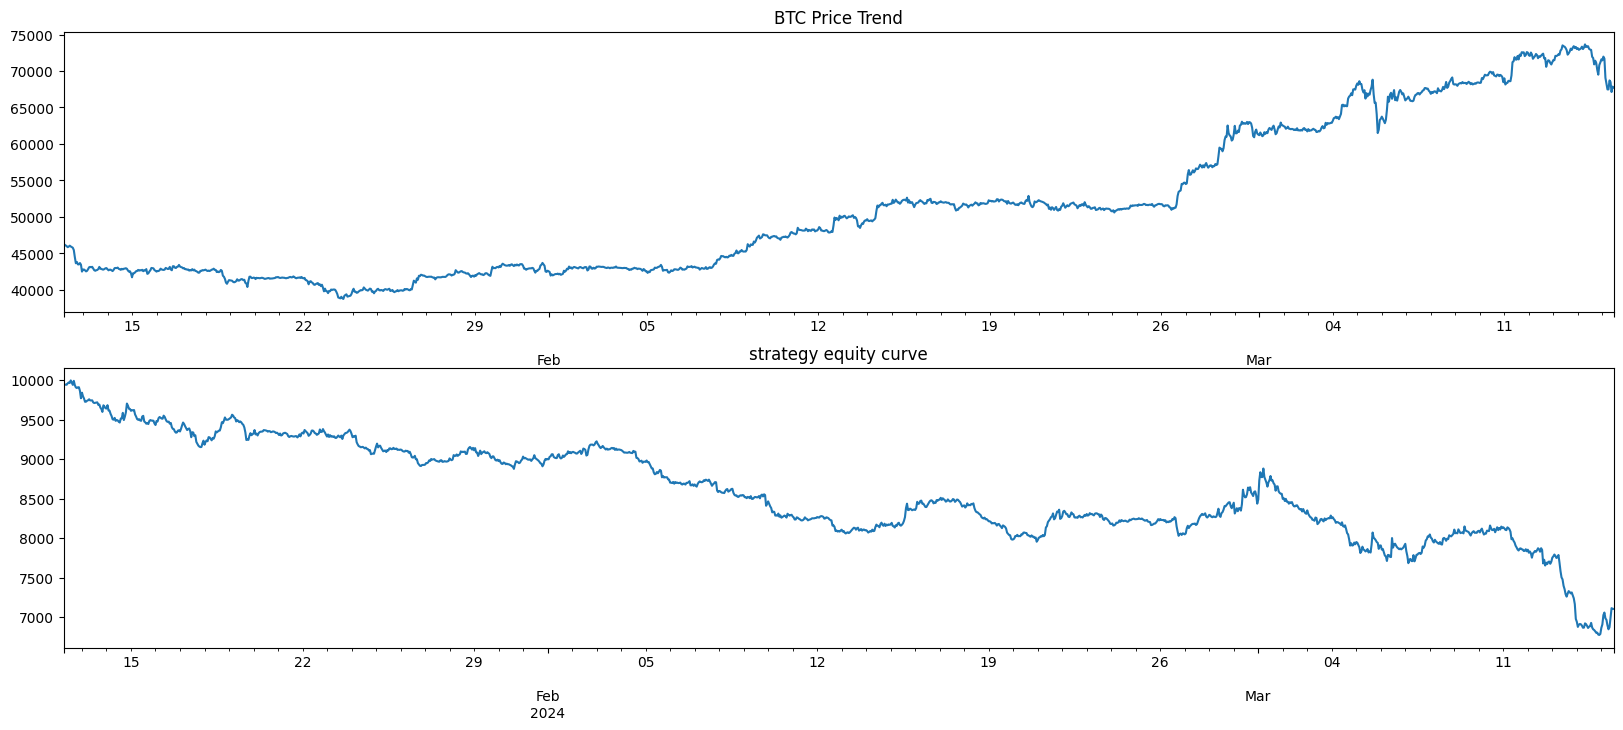

In [3]:
symbols = ["ETHUSDT", "BTCUSDT", "BNBUSDT", "SOLUSDT"]
interval = "1h"
st = "2024-01-01 00:00:00"
et = datetime.utcnow().strftime("%Y-%m-%d %H:%M:%S")

factor_lis = ["ts_midpoint(ts_natr(high,low,close,7),14)", "ts_delta(dynamic_ts_max(ts_bbands(close,20),28),7)",
              "ts_midpoint(ts_ht_trendmode(close),21)"]

factor_calculator = FactorCalculator(function_map, different_axis=['ts', 'symbol', 'return_1'])
factor_scaler = FactorScaler(scaling_window=180, orthogonalize=False, orthogonal_method='symmetry', ts_normalize=True, cross_section_normalize=False)
factor_selector = FactorSelector()
factor_aggregator = FactorAggregatorIC(training_window=90, rolling_type="avg", ic_type='pearson')

strategy_engine = StrategyEngine(init_factor_lis=factor_lis, factor_calculator=factor_calculator,
                                 factor_scaler=factor_scaler, factor_selector=factor_selector, factor_aggregator=factor_aggregator)
strategy_engine.run_backtest(symbols, interval, st, et, init_cash=10000.0, order_size=10000.0,
                                                taker_fee=0.0004, display=True, plot=True)
